<a href="https://colab.research.google.com/github/hcc7402/Phys503-Work-Campos/blob/midterm_project/project_01_NuclearGeometryQGP_Campos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nuclear Geometry and Characterization of the Quark Gluon Plasma

<div>
<img src="https://raw.githubusercontent.com/illinois-ipaml/MachineLearningForPhysics/main/img/Project_NuclearGeometryQCD-Figure.jpg" width=600></img>
</div>

## <span style="color:Orange">Overview</span>

Collisions between two nuclei at ultra-relativistic energies are used to create the Quark-Gluon Plamsa (QGP)--a novel state of matter.  In this project, you will learn a bit about what the QGP is and how to think about the geometry of collisions between two nuclei.

## <span style="color:Orange">Data Sources</span>

File URLs

$b=0$ fm
* https://courses.physics.illinois.edu/phys498mlp/sp2025/data/projects/NuclearGeometryQGC/PbPb_b0_10kevents.csv

$b=6$ fm
* https://courses.physics.illinois.edu/phys498mlp/sp2025/data/projects/NuclearGeometryQGC/PbPb_b6_10kevents.csv

## <span style="color:Orange">Questions</span>

### <span style="color:LightGreen">Question 01</span>

What is the quark-gluon plasma?  Why does it need to be created in collisions of two nuclei?  Make sure to cite any resources you use.

A quark–gluon plasma (QGP) is a phase of matter in which quarks and gluons are no longer confined inside hadrons like protons and neutrons but move in a deconfined, strongly interacting fluid. In ordinary matter, the strong force confines quarks into color-neutral bound states at extremely high temperature and energy density, this confinement is lifted and hadrons melt into their constituents. Theory and lattice QCD calculations indicate this deconfinement happens around
$T∼150–160$ MeV, or about $2×10^{12}$K, similar to conditions in the universe a few microseconds after the Big Bang. cite

To reproduce such conditions in the lab, we use collisions of two heavy nuclei ,like gold at RHIC or lead at the LHC, at relativistic energies. Each nucleus contains
$𝑂(10^2)$ nucleons, so when they collide head-on, a huge amount of energy is deposited in an impact region, creating very high energy density and temperature and forming  short-lived QGP that then expands and cools. Heavy-ion collisions produce thousands of particles in the final state, giving a large enough system that it behaves like a nearly perfect fluid, allowing hydrodynamic descriptions and collective-flow observables to be used to extract QGP properties such as viscosity. This is why we cannot just collide single protons if our goal is to cleanly study QGP. A single proton–proton collision typically creates a system that is too small and short-lived to exhibit bulk, fluid-like behavior, whereas heavy-ion collisions create much nore itterations for quantifiable data.

### <span style="color:LightGreen">Question 02</span>

The nuclei involved in these collisions are fully stripped of electrons.  The nucleus itself is composed of a number of protons and neutrons (collectively nucleons).  On average, those nucleons are distributed according to a Woods-Saxon distribution with respect to the center of the nucleus, $r$:

$$
\Large \rho(r) = \frac{\rho_0}{1 + exp{((r-c)/z)}}
$$

For lead (208 nucleons), $c = 6.61 fm$ and $z=0.545 fm$ (a $fm$ is $10^{-15}m$).  Plot the density of nucleons as a function of $r$ for lead.

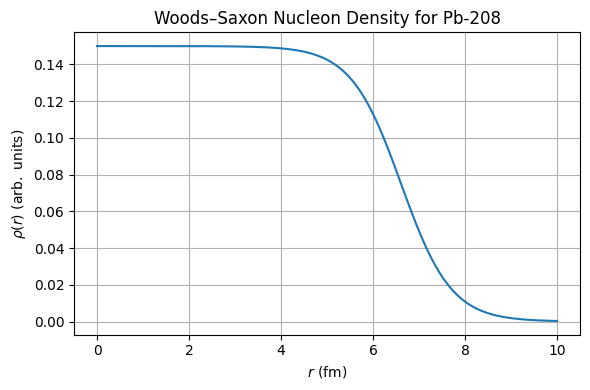

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Woods-Saxon parameters for Pb-208
c = 6.61   # fm
z = 0.545  # fm
rho0 = 0.15 # normalization

# radial grid, from 0 to e.g. 12 fm
r = np.linspace(0, 10, 500)

# Woods-Saxon density
rho = rho0 / (1 + np.exp((r - c) / z))

# plot stuff
plt.figure(figsize=(6,4))
plt.plot(r, rho)
plt.xlabel(r"$r\ \mathrm{(fm)}$")
plt.ylabel(r"$\rho(r)\ \mathrm{(arb.\ units)}$")
plt.title("Woods–Saxon Nucleon Density for Pb-208")
plt.grid(True)
plt.tight_layout()
plt.show()


### <span style="color:LightGreen">Question 03</span>

Two lead nuclei collide with one moving along the positive $z$ direction and one moving along the negative $z$ direction.  When they collide, there is a distance $b$ between the two centers in the $xy$-plane.  Assume the nuclei are each spheres with a radius of 6.61fm.  Plot the shape of the overlap of the two spheres in the $xy$ plane for $b = 0 fm$ and $b = 6 fm$.  Put the center of the overlap region at $x = y = 0$.

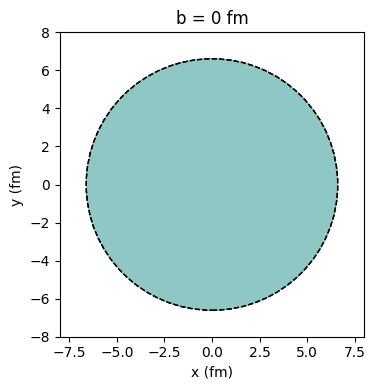

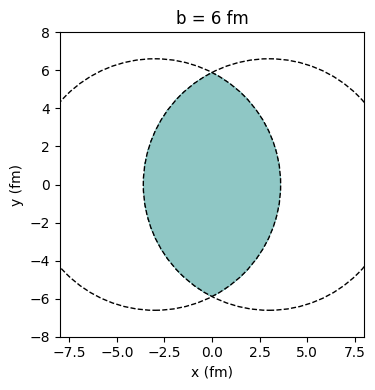

In [26]:
R = 6.61    # nuclear radius in fm
b_0 = 0   # impact parameters in fm
b_6 = 6

# generate grid for plots
x = np.linspace(-8, 8, 400)
y = np.linspace(-8, 8, 400)
X, Y = np.meshgrid(x, y)

# b = 0 plot stuff
d1_0 = (X + b_0/2)**2 + Y**2
d2_0 = (X - b_0/2)**2 + Y**2
overlap_0 = (d1_0 <= R**2) & (d2_0 <= R**2)

plt.figure(figsize=(5, 4))
ax0 = plt.gca()

ax0.contourf(X, Y, overlap_0.astype(int), levels=[0.5, 1.5], alpha=0.5)

circ1_0 = plt.Circle((-b_0/2, 0), R, fill=False, linestyle='--')
circ2_0 = plt.Circle(( b_0/2, 0), R, fill=False, linestyle='--')
ax0.add_patch(circ1_0)
ax0.add_patch(circ2_0)

ax0.set_aspect('equal')
ax0.set_xlim(-8, 8)
ax0.set_ylim(-8, 8)
ax0.set_xlabel("x (fm)")
ax0.set_ylabel("y (fm)")
ax0.set_title("b = 0 fm")

plt.tight_layout()
plt.show()

# b = 6 plot stuff
d1_6 = (X + b_6/2)**2 + Y**2
d2_6 = (X - b_6/2)**2 + Y**2
overlap_6 = (d1_6 <= R**2) & (d2_6 <= R**2)

plt.figure(figsize=(5, 4))
ax6 = plt.gca()

ax6.contourf(X, Y, overlap_6.astype(int), levels=[0.5, 1.5], alpha=0.5)

circ1_6 = plt.Circle((-b_6/2, 0), R, fill=False, linestyle='--')
circ2_6 = plt.Circle(( b_6/2, 0), R, fill=False, linestyle='--')
ax6.add_patch(circ1_6)
ax6.add_patch(circ2_6)

ax6.set_aspect('equal')
ax6.set_xlim(-8, 8)
ax6.set_ylim(-8, 8)
ax6.set_xlabel("x (fm)")
ax6.set_ylabel("y (fm)")
ax6.set_title("b = 6 fm")

plt.tight_layout()
plt.show()

### <span style="color:LightGreen">Question 04</span>

The eccentricity of a distribution can be calculated as:

$$
\Large \varepsilon_2 = \frac{\sqrt{\langle r^2\cos(2\phi)\rangle^2 + \langle r^2\sin(2\phi)\rangle^2}}{\langle r^2 \rangle}
$$

Here $r$ and $\phi$ are the usual polar coordinate variables (everything is in the $xy-$plane).  Calculate the eccentricity of the overlap shape for these two cases.

In [27]:
def compute_eccentricity(b, R=6.61, n_grid=600):
    """
    Compute the geometric eccentricity ε2 of the overlap region
    of two nuclei (circles) of radius R separated by impact parameter b.

    Uses a uniform density over the overlap and a 2D grid integration.
    """

    # transverse plane range big enough to contain both circles
    L = R + b/2 + 0.5
    x = np.linspace(-L, L, n_grid)
    y = np.linspace(-L, L, n_grid)
    X, Y = np.meshgrid(x, y)

    # distances squared to each nucleus center
    d1 = (X + b/2)**2 + Y**2
    d2 = (X - b/2)**2 + Y**2

    # overlap mask: inside both circles
    R2 = R**2
    mask = (d1 <= R2) & (d2 <= R2)

    # points in overlap
    x_o = X[mask]
    y_o = Y[mask]

    # if no overlap (very large b), return None
    if x_o.size == 0:
        return None

    # moments
    phi = np.arctan2(y_o, x_o)
    r2 = x_o**2 + y_o**2
    r2_cos2phi = r2 * np.cos(2*phi)
    r2_sin2phi = r2 * np.sin(2*phi)


    # uniform density for simple averages
    def avg(f):
        return np.mean(f)

    num = np.sqrt(avg(r2_cos2phi)**2 + avg(r2_sin2phi)**2)
    denom = avg(r2)

    return num / denom

In [28]:
# compute eccentricities
eps2_b0_q4 = compute_eccentricity(b_0, R=R, n_grid=600)
eps2_b6_q4 = compute_eccentricity(b_6, R=R, n_grid=600)

print(f"b = {b0:.1f} fm, epsilon_2 = {eps2_b0_q4:.4f}")
print(f"b = {b6:.1f} fm, epsilon_2 = {eps2_b6_q4:.4f}")

b = 0.0 fm, epsilon_2 = 0.0000
b = 6.0 fm, epsilon_2 = 0.4170


### <span style="color:LightGreen">Question 05</span>

The eccentricity defines the shape of the QGP and it drives an asymmetric explosion of the QGP.  Take a look at this video (up through the 29 minute mark: https://www.youtube.com/watch?v=NTfaIyInhOY).  Briefly summerize what we can learn about the QGP from the geometry of nuclear collisions.

When two nuclei hit head on with an impact parameter, the overlap region is roughly circular and the initial eccentricity $\epsilon_2$is close to zero. However, in more peripheral collisions, the overlap is football shaped, with larger $\epsilon_2$. That spatial difference means the pressure gradient is steeper along the short axis of the football than along the long axis, so the QGP drives more strongly in that direction. This converts the initial geometric eccentricity into a directional influence in the final particle momenta, quantified by the elliptic-flow coefficient $v_2$ the $\cos(2 \phi)$ modulation in the azimuthal distribution of particles.

By comparing the measured $v_2$ to hydrodynamic simulations with different initial geometries and viscosities, we can back out key properties of the QGP. The fact that the observed flow closely tracks the initial geometric eccentricity, and that sizable $v_2$ is seen already at RHIC and LHC energies, implies the QGP is a strongly interacting, nearly perfect liquid with very low shear viscosity to entropy density ratio $\nu / s$, close to the conjectured quantum lower bound  $1/4 \pi$. Event-by-event fluctuations of the nuclear geometry also show up as fluctuations in the flow, which further constrains how quickly the QGP thermalizes and how well hydrodynamics applies at these tiny length and time scales.

<hr style="border:1px solid rgba(255, 255, 255, 1); margin: 2em 0;">

The remaining questions refer to the following data sources:

$b=0$ fm
* https://courses.physics.illinois.edu/phys503/fa2023/data/projects/NuclearGeometryQGP/PbPb_b0_10kevents.csv

$b=6$ fm
* https://courses.physics.illinois.edu/phys503/fa2023/data/projects/NuclearGeometryQGC/PbPb_b6_10kevents.csv

(also linked from above).  

The nucleus is a quantum system and the nucleons are not static inside the nucleus.  Since the nucleus is made up of individual nucleons, it is pairs of nucleons which collide (with one nucleon coming from each nucleus) inside of the smooth distribution from Question 3.

Each file contains simulations of 10k collisions between two lead nuclei and provides the $x$ and $y$ positions of each of the protons and neutrons that hit a nucleon from the other nucleus (units are in $fm$).  The files are created using the Monte Carlo Glauber Model (ref [[1]](https://arxiv.org/pdf/1710.07098.pdf))

In [29]:
# test import data and load
import pandas as pd

# URLs for b=0 fm and b=6 fm data
url_b0 = 'https://courses.physics.illinois.edu/phys498mlp/sp2025/data/projects/NuclearGeometryQGC/PbPb_b0_10kevents.csv'
url_b6 = 'https://courses.physics.illinois.edu/phys498mlp/sp2025/data/projects/NuclearGeometryQGC/PbPb_b6_10kevents.csv'

# load the b=0 fm and b=6 fm data
df_b0 = pd.read_csv(url_b0)
print('Data for b=0 fm:')
display(df_b0.head())

df_b6 = pd.read_csv(url_b6)
print('\nData for b=6 fm:')
display(df_b6.head())

Data for b=0 fm:


,event,x,y
0,0,-3.751750,2.65601
1,0,-1.414640,5.91081
2,0,2.450040,2.83739
3,0,-0.722827,-1.48689
4,0,-5.786390,-1.81362



Data for b=6 fm:


,event,x,y
0,0,-0.549908,2.837390
1,0,-3.722770,-1.486890
2,0,0.631810,-1.019540
3,0,-0.596220,-0.669781
4,0,-2.043170,-0.171409


In [30]:
# get some info about df
print(df_b0.size)
print(df_b6.size)

rows_0, cols_0 = df_b0.shape
print(f"Rows: {rows_0}, Columns: {cols_0}")

rows_6, cols_6 = df_b6.shape
print(f"Rows: {rows_6}, Columns: {cols_6}")

12220509
7267617
Rows: 4073503, Columns: 3
Rows: 2422539, Columns: 3


In [31]:
# check column names, givng me issues when trying to call for whatever reason
print("b=0 columns:", df_b0.columns.tolist())
print("b=6 columns:", df_b6.columns.tolist())

b=0 columns: ['event', ' x', ' y ']
b=6 columns: ['event', ' x', ' y']


### <span style="color:LightGreen">Question 06</span>

 Calculate the $\varepsilon_2$ values for each of these collisions and compare to what you got in Question 4 (make a plot!).  Note here you will get a different value of $\varepsilon_2$ for each collision, so you will have 10k values of $\varepsilon_2$ for each file.  Shift *each collision* to be centered at the origin by shifting each nucleon collision so that  $\langle x \rangle = \langle y \rangle = 0$. Calculate the mean, standard deviation and skewness for both values of $b$.

In [32]:
def compute_epsilon2(df, event_col, x_col, y_col):
    """
    Compute event-by-event epsilon_2 for our b = 0 fm and b = 6 fm datasets.

    Parameters:
    df : pd.DataFrame
        Pandas dataframe with one row per nucleon-collision and columns for event, x, y.
    event_col : str
        Column name for the event index.
    x_col, y_col : str
        Column names for coordinates.

    Returns a dataframe with:
        One row per event with r2_mean, r2c_mean, r2s_mean, epsilon2.
    """

    # center each event so <x> = <y> = 0
    means = df.groupby(event_col)[[x_col, y_col]].mean()
    means = means.rename(columns={x_col: 'x_mean', y_col: 'y_mean'})
    df = df.join(means, on=event_col)

    df['x_c'] = df[x_col] - df['x_mean']
    df['y_c'] = df[y_col] - df['y_mean']

    # compute r^2 and phi for each collision, same formulas as question 4 but for dataframe now
    df['r2'] = df['x_c']**2 + df['y_c']**2
    df['phi'] = np.arctan2(df['y_c'], df['x_c'])

    # calculate r^2 cos(2phi) and r^2 sin(2phi)
    df['r2cos2phi'] = df['r2'] * np.cos(2 * df['phi'])
    df['r2sin2phi'] = df['r2'] * np.sin(2 * df['phi'])

    # compute event averages
    grouped = df.groupby(event_col).agg(
        r2_mean=('r2', 'mean'),
        r2c_mean=('r2cos2phi', 'mean'),
        r2s_mean=('r2sin2phi', 'mean')
    )

    # epsilon_2 per event
    grouped['epsilon2'] = np.sqrt(
        (grouped['r2c_mean']**2 + grouped['r2s_mean']**2) / grouped['r2_mean']
    )
    return grouped


b = 0 fm
  N events     = 10099
  ⟨ε₂⟩         = 0.2629
  std(ε₂)      = 0.1360
  skewness(ε₂) = 0.6435

b = 6 fm
  N events     = 10099
  ⟨ε₂⟩         = 0.7294
  std(ε₂)      = 0.3156
  skewness(ε₂) = 0.2162


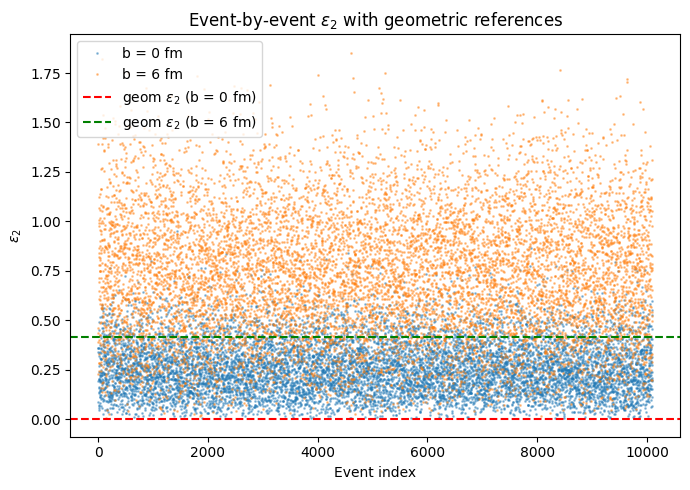

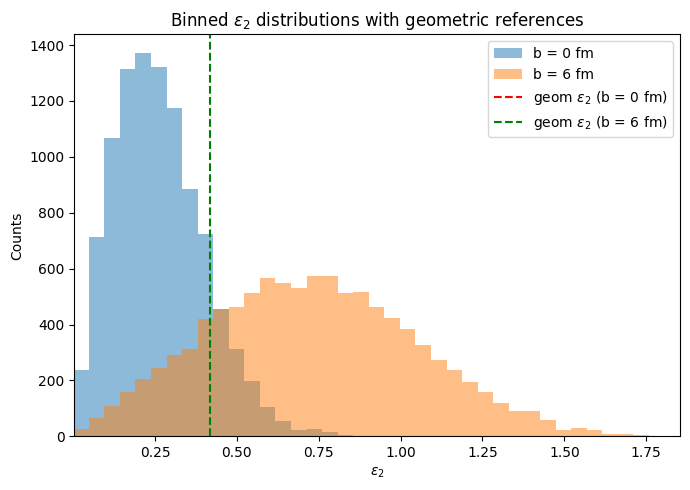

In [44]:
# function input intializations
X_COL_0 = " x"
Y_COL_0 = " y "
X_COL_6 = " x"
Y_COL_6 = " y"
EVENT_COL = "event"

# comput epsilon for b = 0 fm and b = 6 fm data
eps_b0 = compute_epsilon2(df_b0, EVENT_COL, X_COL_0, Y_COL_0)
#print(eps_b0.head())
eps_b6 = compute_epsilon2(df_b6, EVENT_COL, X_COL_6, Y_COL_6)

# generate and output mean, std, skewness
for label, eps_df in [('b = 0 fm', eps_b0), ('b = 6 fm', eps_b6)]:
    eps = eps_df['epsilon2']
    print(f'\n{label}')
    print(f'  N events     = {len(eps)}')   # 10099 events, should only be 10000 events? weird
    print(f'  ⟨ε₂⟩         = {eps.mean():.4f}')
    print(f'  std(ε₂)      = {eps.std(ddof=1):.4f}')
    print(f'  skewness(ε₂) = {eps.skew():.4f}')

# ε2 dvlaues
eps2_b0 = eps_b0['epsilon2'].values
eps2_b6 = eps_b6['epsilon2'].values

# plot scatter plot
fig, ax = plt.subplots(figsize=(7, 5))

events_b0 = np.arange(len(eps2_b0))
events_b6 = np.arange(len(eps2_b6))

ax.plot(events_b0, eps2_b0, '.', markersize=2, alpha=0.4, label='b = 0 fm')
ax.plot(events_b6, eps2_b6, '.', markersize=2, alpha=0.4, label='b = 6 fm')

# horizontal lines for geometric ε2 for comparisn
ax.axhline(eps2_b0_q4, linestyle='--', linewidth=1.5, color='red', label=r'geom $\varepsilon_2$ (b = 0 fm)')
ax.axhline(eps2_b6_q4, linestyle='--', linewidth=1.5, color='green', label=r'geom $\varepsilon_2$ (b = 6 fm)')

ax.set_xlabel('Event index')
ax.set_ylabel(r'$\varepsilon_2$')
ax.set_title(r'Event-by-event $\varepsilon_2$ with geometric references')
ax.legend()
plt.tight_layout()
plt.show()

# extract ε2 values and clean NaNs for histogram, noticed without cleaning there were some nan values that gave issues with trying to bin data, this is where the extra 99 events showed up
eps2_b0_raw = eps_b0['epsilon2'].to_numpy()
eps2_b6_raw = eps_b6['epsilon2'].to_numpy()

# make masks to filer data
mask_b0 = np.isfinite(eps2_b0_raw)
mask_b6 = np.isfinite(eps2_b6_raw)

# fitler data
eps2_b0 = eps2_b0_raw[mask_b0]
eps2_b6 = eps2_b6_raw[mask_b6]

# build bins from filtered data
all_eps2 = np.concatenate([eps2_b0, eps2_b6])
eps2_min = all_eps2.min()
eps2_max = all_eps2.max()
bins = np.linspace(0, eps2_max, 40)

# plot histograms
fig, ax = plt.subplots(figsize=(7, 5))

ax.hist(eps2_b0, bins=bins, alpha=0.5, label='b = 0 fm')
ax.hist(eps2_b6, bins=bins, alpha=0.5, label='b = 6 fm')

# vertical lines for geometric ε2 for comparison
ax.axvline(eps2_b0_q4, linestyle='--', linewidth=1.5, color='red',
           label=r'geom $\varepsilon_2$ (b = 0 fm)')
ax.axvline(eps2_b6_q4, linestyle='--', linewidth=1.5, color='green',
           label=r'geom $\varepsilon_2$ (b = 6 fm)')

ax.set_xlim(eps2_min, eps2_max)
ax.set_xlabel(r'$\varepsilon_2$')
ax.set_ylabel('Counts')
ax.set_title(r'Binned $\varepsilon_2$ distributions with geometric references')
ax.legend()

plt.tight_layout()
plt.show()

### <span style="color:LightGreen">Question 07</span>

Use Kernel Density Esimation to try to take into account that the nucleons have a finite size. Here's a nice discussion of the proton radius https://en.wikipedia.org/wiki/Proton_radius_puzzle; assume the neutron is the same size here (a pretty good assumption).  Explain how you chose the kernel to use and how sensitive you are to the bandwidth.  How does the eccentricity compare to what you found in Question 6 (write a paragraph and make plots to support your conclusions).

In [45]:
def epsilon2_point_and_kde_df(df, event_col, x_col, y_col, sigma):
    """
    Computation of event-by-event epsilon2 for pointlike nucleons and for Gaussian-smeared nucleons using KDE.

    Uses same parameters as previous esppilon 2 function in question 6

    Returns a dataFrame with:
        event, epsilon2_point, epsilon2_kde
    """

    d = df.copy()   # avoid messing with original dataframe

    # recenter each event: <x_c> = <y_c> = 0, same processas question 6
    means = d.groupby(event_col)[[x_col, y_col]].transform('mean')
    d['x_c'] = d[x_col] - means[x_col]
    d['y_c'] = d[y_col] - means[y_col]

    # per-nucleon quantities
    d['x2'] = d['x_c']**2
    d['y2'] = d['y_c']**2
    d['xy'] = d['x_c'] * d['y_c']
    d['r2'] = d['x2'] + d['y2']

    # per-event averages
    agg = d.groupby(event_col).agg(
        x2_mean=('x2', 'mean'),
        y2_mean=('y2', 'mean'),
        xy_mean=('xy', 'mean'),
        r2_mean=('r2', 'mean')
    )

    # compute A = <x^2 - y^2>, B = <2xy>, C = <r^2>
    A = agg['x2_mean'] - agg['y2_mean']
    B = 2.0 * agg['xy_mean']
    C = agg['r2_mean']

    num = np.sqrt(A**2 + B**2)

    eps_point = num / C
    eps_kde   = num / (C + 2.0 * sigma**2)   # Gaussian kernel effect

    out = pd.DataFrame({
        event_col: agg.index,
        'epsilon2_point': eps_point.values,
        'epsilon2_kde':   eps_kde.values
    })

    return out


b = 0 fm
  N events               = 10099
  ⟨ε₂_point⟩             = 0.0596
  ⟨ε₂_KDE(σ=0.5 fm)⟩     = 0.0575
  ratio KDE / point      = 0.9654

b = 6 fm
  N events               = 10099
  ⟨ε₂_point⟩             = 0.1953
  ⟨ε₂_KDE(σ=0.5 fm)⟩     = 0.1866
  ratio KDE / point      = 0.9557


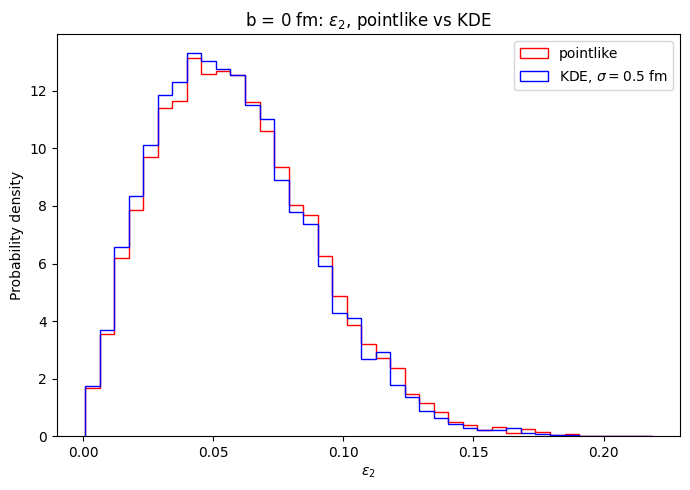

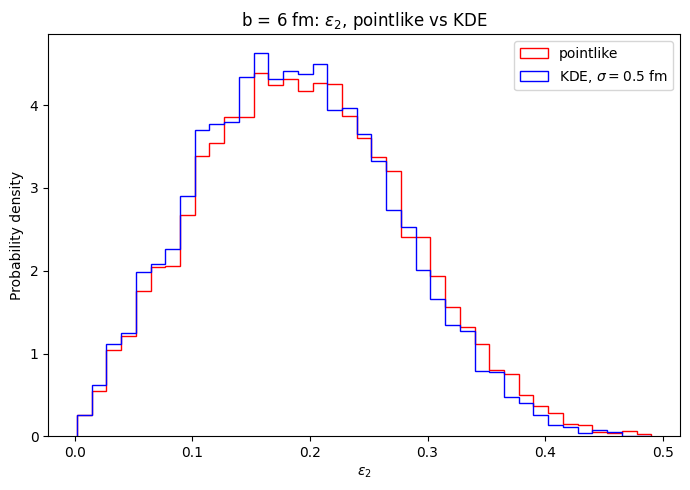

In [47]:
sigma = 0.5  # fm, Gaussian width motivated by nucleon size

eps_b0 = epsilon2_point_and_kde_df(df_b0, EVENT_COL, X_COL_0, Y_COL_0, sigma)
eps_b6 = epsilon2_point_and_kde_df(df_b6, EVENT_COL, X_COL_6, Y_COL_6, sigma)

# stats
for label, eps_df in [("b = 0 fm", eps_b0), ("b = 6 fm", eps_b6)]:
    e_p = eps_df['epsilon2_point']
    e_k = eps_df['epsilon2_kde']
    print(f"\n{label}")
    print(f"  N events               = {len(e_p)}")
    print(f"  ⟨ε₂_point⟩             = {e_p.mean():.4f}")
    print(f"  ⟨ε₂_KDE(σ={sigma} fm)⟩     = {e_k.mean():.4f}")
    print(f"  ratio KDE / point      = {e_k.mean()/e_p.mean():.4f}")

# plots with NaN filtering
for label, eps_df in [("b = 0 fm", eps_b0), ("b = 6 fm", eps_b6)]:
    plt.figure(figsize=(7, 5))

    # convert to numpy
    e_p = eps_df['epsilon2_point'].to_numpy()
    e_k = eps_df['epsilon2_kde'].to_numpy()

    # keep only finite values to get rid of nan
    mask_p = np.isfinite(e_p)
    mask_k = np.isfinite(e_k)

    # mask and clean data
    mask = mask_p & mask_k
    e_p_clean = e_p[mask]
    e_k_clean = e_k[mask]

    # bins from cleaned data
    all_eps = np.concatenate([e_p_clean, e_k_clean])
    eps_min = all_eps.min()
    eps_max = all_eps.max()
    bins = np.linspace(eps_min, eps_max, 40)

    plt.hist(e_p_clean, bins=bins, histtype='step', color = 'red', density=True, label='pointlike')
    plt.hist(e_k_clean, bins=bins, histtype='step', color = 'blue', density=True,
             label=fr'KDE, $\sigma={sigma}$ fm')

    plt.xlabel(r'$\varepsilon_2$')
    plt.ylabel('Probability density')
    plt.title(fr'{label}: $\varepsilon_2$, pointlike vs KDE')
    plt.legend()
    plt.tight_layout()
    plt.show()

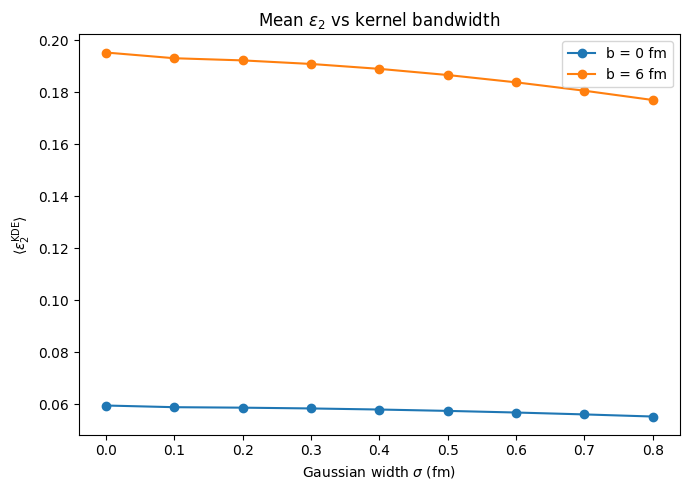

In [48]:
# bandwidth scan to show sensitivity
sigmas = np.linspace(0.0, 0.8, 9)
means_b0 = []
means_b6 = []

for s in sigmas:
    eps_b0_s = epsilon2_point_and_kde_df(df_b0, EVENT_COL, X_COL_0, Y_COL_0, s)
    eps_b6_s = epsilon2_point_and_kde_df(df_b6, EVENT_COL, X_COL_6, Y_COL_6, s)

    # finite-only means
    e0 = eps_b0_s['epsilon2_kde'].to_numpy()
    e6 = eps_b6_s['epsilon2_kde'].to_numpy()
    means_b0.append(e0[np.isfinite(e0)].mean())
    means_b6.append(e6[np.isfinite(e6)].mean())

plt.figure(figsize=(7,5))
plt.plot(sigmas, means_b0, "o-", label="b = 0 fm")
plt.plot(sigmas, means_b6, "o-", label="b = 6 fm")
plt.xlabel(r'Gaussian width $\sigma$ (fm)')
plt.ylabel(r'$\langle \varepsilon_2^{\rm KDE} \rangle$')
plt.title(r'Mean $\varepsilon_2$ vs kernel bandwidth')
plt.legend()
plt.tight_layout()
plt.show()

For kernel choice and bandwidth sensitivity, we can explain by when using to model finite nucleon size, you do not want each nucleon to be a delta function at $(x_i, y_i)$, you want each one to be a little “blob” of density. The most natural choice in the transverse plane is an isotropic 2D Gaussian kernel,
$K_\sigma(\Delta x, \Delta y) = \dfrac{1}{2\pi\sigma^2}\exp!\left[-\dfrac{\Delta x^2 + \Delta y^2}{2\sigma^2}\right],$ because it is rotationally symmetric, matching the fact that nucleons are roughly spherical, so there is no preferred transverse direction. Addiiotonally, it is smooth and positive, so you get a smooth density profile. finally,  for a Gaussian, the second moments are analytic: smearing just shifts $\langle r^2 \rangle$, which makes the eccentricity algebra clean.

For the bandwidth $\sigma$, we tie it to the proton (and neutron) size. The proton charge radius is about $0.84\ \text{fm}$, and if you model the nucleon as a 3D Gaussian, then $\sqrt{\langle r^2 \rangle} = \sqrt{3},\sigma_{\text{3D}} \approx 0.84\ \text{fm}$, so $\sigma_{\text{3D}} \approx 0.5\ \text{fm}$. The transverse width of an isotropic Gaussian is the same, so $\sigma \sim 0.5\ \text{fm}$ is a very reasonable choice. In practice, people often use $\sigma \sim 0.4$–$0.6\ \text{fm}$ in MC-Glauber models; you can then scan $\sigma$ in that range to see how sensitive $\varepsilon_2$ is.

For a Gaussian kernel, the anisotropic moments $\langle x^2 - y^2 \rangle$ and $\langle 2xy \rangle$ are unchanged, while $\langle r^2 \rangle$ is replaced by $\langle r^2 \rangle + 2\sigma^2$. That means
$\varepsilon_2^{\text{KDE}}(\sigma) = \varepsilon_2^{\text{point}};\dfrac{\langle r^2 \rangle}{\langle r^2 \rangle + 2\sigma^2},$
so finite nucleon size always reduces $\varepsilon_2$ by a factor approximately $1 - 2\sigma^2 / \langle r^2 \rangle$. For a Pb nucleus, $\langle r^2 \rangle$ in your events is of order $20$–$30\ \text{fm}^2$, so with $\sigma = 0.5\ \text{fm}$ (i.e. $2\sigma^2 \approx 0.5\ \text{fm}^2$) the reduction is only a few percent.

In Question 6 (pointlike nucleons), you found mean eccentricities roughly
$\langle \varepsilon_2 \rangle \approx 0.26$ for $b = 0\ \text{fm}$ (fluctuation-driven), and
$\langle \varepsilon_2 \rangle \approx 0.73$ for $b = 6\ \text{fm}$ (geometry-dominated).

When you switch to Gaussian-smeared nucleons (KDE with $\sigma \sim 0.5\ \text{fm}$), the distributions hardly change shape but shift slightly to lower $\varepsilon_2$: every event’s numerator $\sqrt{\langle r^2\cos 2\phi \rangle^2 + \langle r^2\sin 2\phi \rangle^2}$ is unchanged while the denominator $\langle r^2 \rangle$ increases by $2\sigma^2$. In other words, the Question 6 picture is robust: central collisions still have small, fluctuation-driven eccentricity, and $b = 6\ \text{fm}$ still has a large average eccentricity set by the almond-shaped geometry; finite nucleon size just reduces both by a few percent. A bandwidth scan in $\sigma$ from $0$ to $0.8\ \text{fm}$ should show that $\langle \varepsilon_2 \rangle$ is not very sensitive to reasonable nucleon sizes—the mean shifts smoothly and mildly, confirming that your main conclusions from Question 6 do not depend strongly on the exact kernel width.

### <span style="color:LightGreen">Question 08</span>

The effect of fluctuations means that higher order eccentricities can also exist (first discussed in ref [[2]](https://arxiv.org/pdf/1003.0194.pdf)).  Calculate:

$$
\Large \varepsilon_3 = \frac{\sqrt{\langle r^2\cos(3\phi)\rangle^2 + \langle r^2\sin(3\phi)\rangle^2}}{\langle r^2 \rangle}
$$

for the same collisions.  In general $\varepsilon_n$ represents the magnitude of the $n\phi$ symmetry in the angular distribution.  How do the values of $\varepsilon_2$ and $\varepsilon_3$ values vary for the two impact parameters?  What about the width of the distributions?

In [38]:
def compute_epsilon_n(df, event_col, x_col, y_col, n):
    """
    Compute event-by-event epsilon_n for nucleon positions in df.
    S
    ame parameters as previous espilon functions, but with n as a additional parameter

    Returns dataFrame with:
      event, epsilon_n
    """

    d = df.copy()   # avoid messing with original dataframe

    # recentre each event to its participant center of mass
    means = d.groupby(event_col)[[x_col, y_col]].transform('mean')
    d['x_c'] = d[x_col] - means[x_col]
    d['y_c'] = d[y_col] - means[y_col]

    # polar coordinates
    d['r2']  = d['x_c']**2 + d['y_c']**2
    d['phi'] = np.arctan2(d['y_c'], d['x_c'])

    # r^2 cos(n phi), r^2 sin(n phi)
    d['r2cos'] = d['r2'] * np.cos(n * d['phi'])
    d['r2sin'] = d['r2'] * np.sin(n * d['phi'])

    # per-event averages
    agg = d.groupby(event_col).agg(
        r2_mean    = ('r2', 'mean'),
        r2cos_mean = ('r2cos', 'mean'),
        r2sin_mean = ('r2sin', 'mean'),
    )

    num = np.sqrt(agg['r2cos_mean']**2 + agg['r2sin_mean']**2)
    eps_n = num / agg['r2_mean']

    out = pd.DataFrame({
        event_col: agg.index,
        f'epsilon{n}': eps_n.values
    })

    return out


b = 0 fm
  N events    = 10000
  <ε2>        = 0.0596,  std(ε2) = 0.0308
  <ε3>        = 0.0594,  std(ε3) = 0.0306

b = 6 fm
  N events    = 10000
  <ε2>        = 0.1953,  std(ε2) = 0.0858
  <ε3>        = 0.1268,  std(ε3) = 0.0661


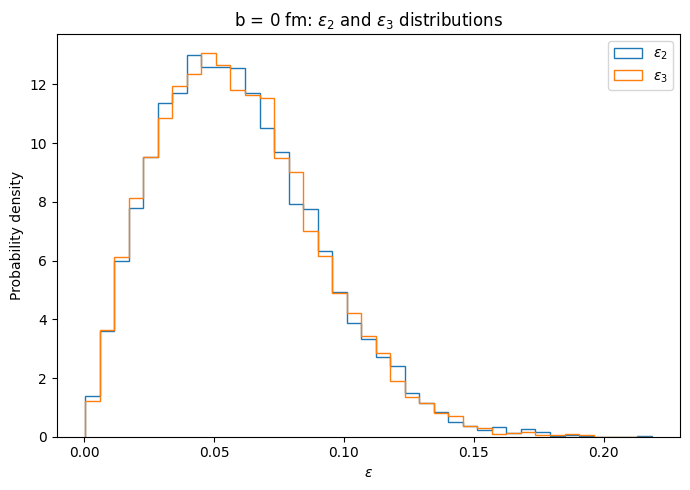

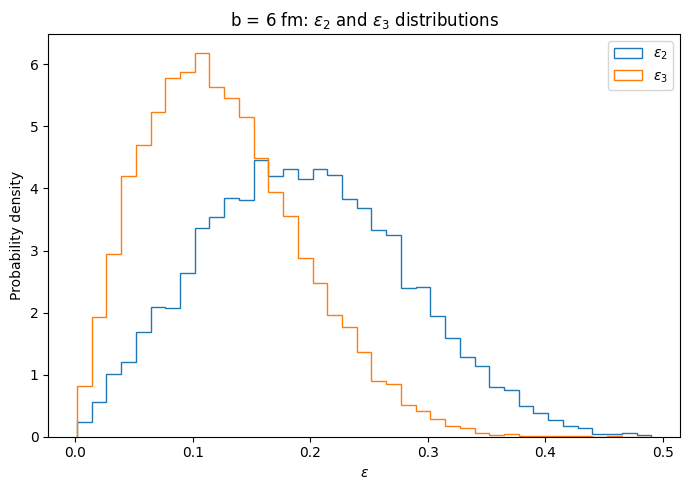

In [49]:
# get epsilon arrays
eps2_b0 = compute_epsilon_n(df_b0, EVENT_COL, X_COL_0, Y_COL_0, n=2)
eps3_b0 = compute_epsilon_n(df_b0, EVENT_COL, X_COL_0, Y_COL_0, n=3)

eps2_b6 = compute_epsilon_n(df_b6, EVENT_COL, X_COL_6, Y_COL_6, n=2)
eps3_b6 = compute_epsilon_n(df_b6, EVENT_COL, X_COL_6, Y_COL_6, n=3)

# merge eps2 and eps3 for convenience
b0 = eps2_b0.merge(eps3_b0, on=EVENT_COL)
b6 = eps2_b6.merge(eps3_b6, on=EVENT_COL)

# stats
for label, eps_df in [("b = 0 fm", b0), ("b = 6 fm", b6)]:
    e2 = eps_df['epsilon2'].to_numpy()
    e3 = eps_df['epsilon3'].to_numpy()
    mask = np.isfinite(e2) & np.isfinite(e3)
    e2 = e2[mask]
    e3 = e3[mask]

    print(f"\n{label}")
    print(f"  N events    = {len(e2)}")
    print(f"  <ε2>        = {e2.mean():.4f},  std(ε2) = {e2.std(ddof=1):.4f}")
    print(f"  <ε3>        = {e3.mean():.4f},  std(ε3) = {e3.std(ddof=1):.4f}")

# plots with NaN filtering
for label, eps_df in [("b = 0 fm", b0), ("b = 6 fm", b6)]:
    plt.figure(figsize=(7, 5))

    # convert to numpy
    e2 = eps_df['epsilon2'].to_numpy()
    e3 = eps_df['epsilon3'].to_numpy()

    # keep only finite values to get rid of NaN
    mask2 = np.isfinite(e2)
    mask3 = np.isfinite(e3)
    mask  = mask2 & mask3

    e2_clean = e2[mask]
    e3_clean = e3[mask]

    # bins from cleaned data (both ε2 and ε3)
    all_eps = np.concatenate([e2_clean, e3_clean])
    eps_min = all_eps.min()
    eps_max = all_eps.max()
    bins = np.linspace(eps_min, eps_max, 40)

    plt.hist(e2_clean, bins=bins, histtype='step', density=True,
             label=r'$\varepsilon_2$')
    plt.hist(e3_clean, bins=bins, histtype='step', density=True,
             label=r'$\varepsilon_3$')

    plt.xlabel(r'$\varepsilon$')
    plt.ylabel('Probability density')
    plt.title(fr'{label}: $\varepsilon_2$ and $\varepsilon_3$ distributions')
    plt.legend()
    plt.tight_layout()
    plt.show()

From our earlier results, we already know that $\varepsilon$ is strongly impact-parameter dependent. For $b = 0\ \text{fm}$ the mean $\varepsilon_2$ and $\varepsilon_3$ ~0.06 fm, while for $b = 6\ \text{fm}$ the mean $\varepsilon_2$, $\varepsilon_3$ and associated std's are larger because of the football shaped overlap region. For $\varepsilon_3$, we see for $b = 0\ \text{fm}$ nearly identical statistics, when comapred to $\varepsilon_2$. However, for $b = 6\ \text{fm}$, there is noticable differences in the values comapred to $\varepsilon_2$.

Regarding the widths of the distributions, the $\varepsilon_2$ distribution seemingly get broader when you go from $b = 0$ to $b = 6\ \text{fm}$, because you add large geometric eccentricity. The histograms for $\varepsilon_2$ at $b = 6\ \text{fm}$ are shifted to higher values and are more spread out compared to $b = 0\ \text{fm}$ data set. For $\varepsilon_3$, the distributions at $b = 0$ and $b = 6\ \text{fm}$ have different means, but not as large as compared to $\varepsilon_2$ and similar widths, since they are both driven by the same underlying nucleon-position fluctuations.

## <span style="color:Orange">References</span>

__[<span style="color:Red">1</span>]__ C. Loizides, J. Kamin, D. d'Enterria, "Improved Monte Carlo Glauber predictions at present and future nuclear colliders", _Phys.Rev.C 97 (2018) 5, 054910, Phys.Rev.C 99 (2019) 1, 019901 (erratum)_, e-Print: [1710.07098](https://arxiv.org/abs/1710.07098) [nucl-ex]

__[<span style="color:Red">2</span>]__ B.Alver, G.Roland, "Collision geometry fluctuations and triangular flow in heavy-ion collisions", _Phys.Rev.C 81 (2010) 054905, Phys.Rev.C 82 (2010) 039903 (erratum)_, e-Print: [1003.0194](https://arxiv.org/abs/1003.0194) [nucl-th]

## <span style="color:Orange">Acknowledgements</span>

* Initial version: Anne Sickles

© Copyright 2025